In [25]:
import os
os.environ["KERAS_BACKEND"] = "torch"

import torch
import keras
from sklearn.datasets import load_iris

import numpy as np
import matplotlib.pyplot as plt

current_device = torch.cuda.current_device()
print(torch.cuda.get_device_name(current_device))

NVIDIA GeForce GTX 960


In [ ]:
data, target = load_iris(return_X_y=True)
X = data[:, (0, 1, 2)] #sepal length, sepal width, petal length
Y = data[:, 3] # petal width
Z = target # species

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)  │ (None, 3)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 16 (Dense)          │ (None, 16)        │         64 │ input[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 32 (Dense)          │ (None, 32)        │        544 │ 16[0][0]          │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cont_out (Dense)    │ (None, 1)         │         33 │ 32[0][0]          │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cat_out (Dense)     │ (None, 3)         │         99 │ 32[0][0]          │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 740 (2.89 KB)

 Trainable params: 740 (2.89 KB)

 Non-trainable params: 0 (0.00 B)

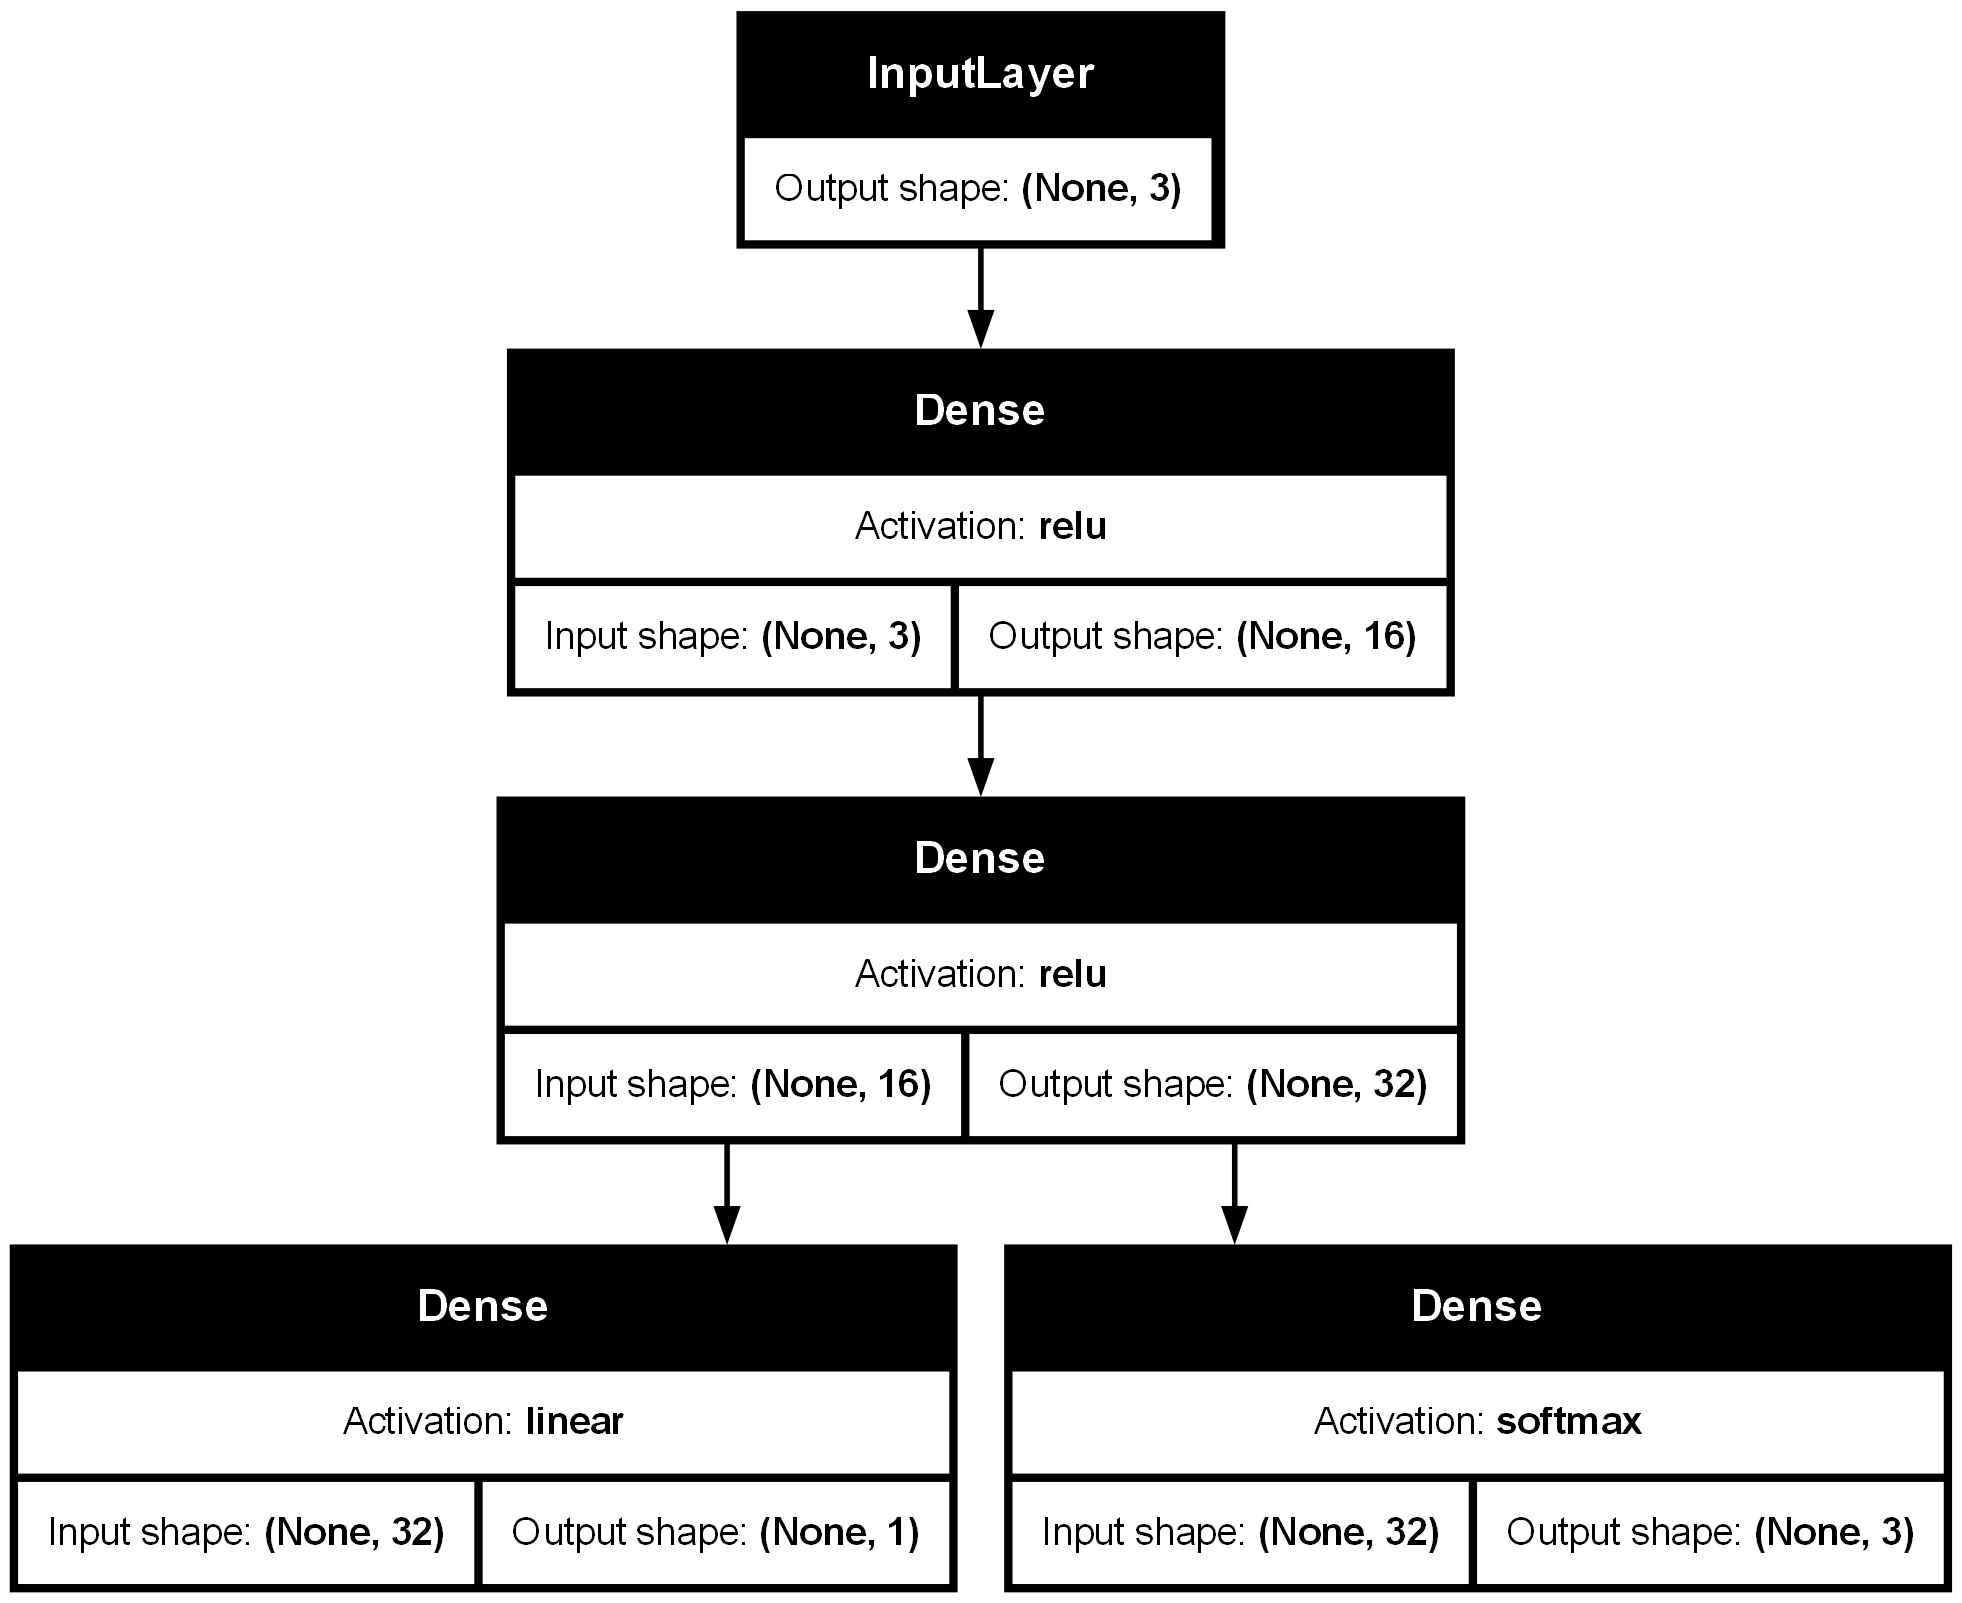

In [3]:
inputs = keras.Input(shape=(3,), name='input')
x = keras.layers.Dense(16, activation='relu', name='16')(inputs)
x = keras.layers.Dense(32, activation='relu', name='32')(x)
output1 = keras.layers.Dense(1, name='cont_out')(x)
output2 = keras.layers.Dense(3, activation='softmax', name='cat_out')(x)

model = keras.Model(inputs=inputs, outputs=[output1, output2])

model.compile(loss={'cont_out': 'mean_absolute_error', 
                    'cat_out': 'sparse_categorical_crossentropy'},
              optimizer='adam',
              metrics={'cat_out': keras.metrics.SparseCategoricalAccuracy(name='acc')})

model.summary()
keras.utils.plot_model(model, "models/model_test.png", show_shapes=True, show_layer_activations=True)

In [20]:
history = model.fit(X, {'cont_out': Y, 'cat_out': Z}, epochs=15, validation_split=0.1, batch_size=8)

Epoch 1/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - cat_out_acc: 0.9497 - cat_out_loss: 0.2040 - cont_out_loss: 0.1549 - loss: 0.3589 - val_cat_out_acc: 0.8667 - val_cat_out_loss: 0.4616 - val_cont_out_loss: 0.4101 - val_loss: 0.8717
Epoch 2/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - cat_out_acc: 0.9569 - cat_out_loss: 0.1972 - cont_out_loss: 0.1414 - loss: 0.3386 - val_cat_out_acc: 0.6000 - val_cat_out_loss: 0.6100 - val_cont_out_loss: 0.3542 - val_loss: 0.9642
Epoch 3/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - cat_out_acc: 0.9566 - cat_out_loss: 0.2078 - cont_out_loss: 0.1434 - loss: 0.3512 - val_cat_out_acc: 0.6000 - val_cat_out_loss: 0.6125 - val_cont_out_loss: 0.4120 - val_loss: 1.0246
Epoch 4/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - cat_out_acc: 0.9377 - cat_out_loss: 0.2072 - cont_out_loss: 0.1460 - loss: 0.3533 - val_cat_out_acc: 0.7333 - val_cat_out_loss: 0.5147 - val_cont_out_loss: 0.3584 - val_loss: 0.8730
Epoch 5/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - cat_out

In [21]:
print(history.history.keys())

dict_keys(['cat_out_acc', 'cat_out_loss', 'cont_out_loss', 'loss', 'val_cat_out_acc', 'val_cat_out_loss', 'val_cont_out_loss', 'val_loss'])


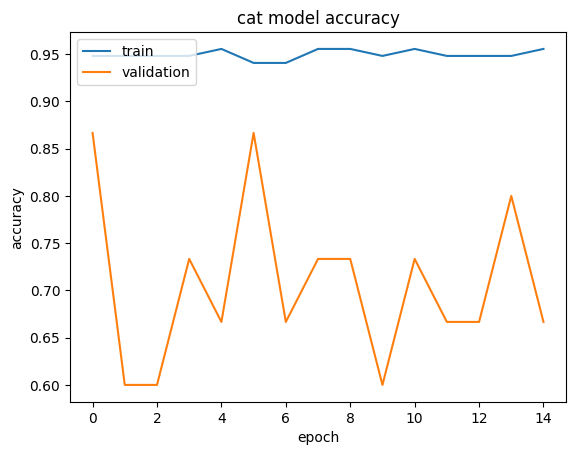

In [22]:
plt.plot(history.history['cat_out_acc'])
plt.plot(history.history['val_cat_out_acc'])
plt.title('cat model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

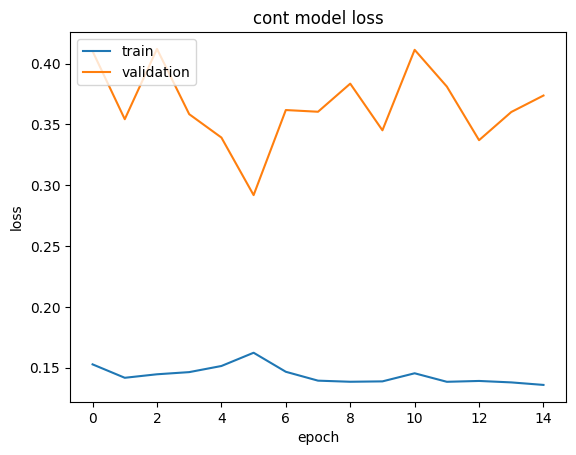

In [23]:
plt.plot(history.history['cont_out_loss'])
plt.plot(history.history['val_cont_out_loss'])
plt.title('cont model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

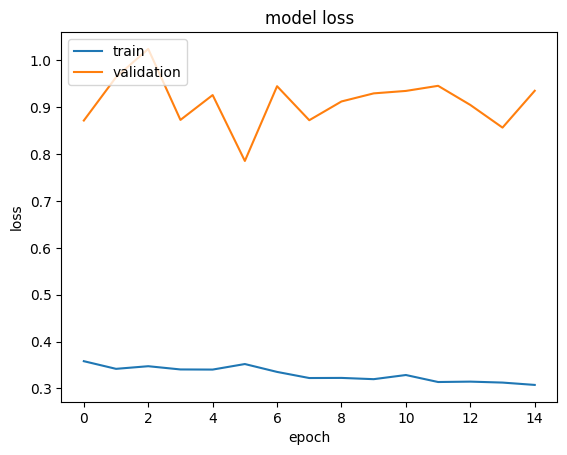

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [ ]:
preds = model.predict(np.array([[7.2, 3.1, 5.8]])) #data of a fairly typical I. virginica
print(preds)

pedal_width = preds[0] #should be approximtaley 2
class_type = np.argmax(preds[1]) #should be class 2
print(f"pedal_width = {pedal_width} / class_type = {class_type}") 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[array([[1.9366968]], dtype=float32), array([[9.2084396e-05, 2.5545898e-01, 7.4444890e-01]], dtype=float32)]
pedal_width = [[1.9366968]] / class_type = 2
